## Installing the required libararies to use community detection algorithms

In [251]:
pip install cdlib[C]

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\amrre\anaconda3\lib\site-packages (from cdlib[C]) (1.3.5)



In [252]:
## here we imported some required libararies to implement our methodlogy

## - pandas is used to read the csv file and check the intial data cleaning tasks such as null values etc. 
## - networkx is used to create network graphs from the textual corpus
## - matplotlib.pyplot is used to create python visualiztions

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## Reading raw dataset

In [253]:
df = pd.read_csv('C:\\Users\\amrre\\Documents\\jupyter\\data\\bitcoin_tweets_clean1.csv', low_memory=False)
df.head()

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,is_retweet
0,DeSota Wilson,39929.836910,8534,7605,4838.0,FALSE,44237.9993518519,Blue Ridge Bank shares halted by NYSE after #b...,False
1,CryptoND,43755.841782,6769,1532,25483.0,FALSE,44237.9991666667,"😎 Today, that's this #Thursday, we will do a ""...",False
2,Tdlmatias,41953.451817,128,332,924.0,FALSE,44237.9963888889,"Guys evening, I have read this article about B...",False
3,Crypto is the future,43736.700139,625,129,14.0,FALSE,44237.9962152778,$BTC A big chance in a billion! Price: \487264...,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,42403.552720,1249,1472,10482.0,FALSE,44237.9959027778,This network is secured by 9 508 nodes as of t...,False


## Removing null values from dataset

In [254]:
df1 = df.dropna()

## Filter based on verified users

In [255]:
df2 = df[(df['user_verified'] == 'TRUE')]
df2.head()

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,is_retweet
23,Alex Jiménez,41024.643669,14469,822,40097.0,TRUE,44237.9896180556,#Bitcoin’s Rally Signals the Rise of Digital A...,False
194,Royalty,39940.257998,31548,2734,26340.0,TRUE,44237.9361458333,If Apple Inc ever makes a move for #Bitcoin as...,False
315,Telegraph Technology Intelligence,39842.590729,82628,239,1.0,TRUE,44237.9027083333,.@LFDodds has more on Twitter saying it could ...,False
438,IGSquawk,41445.385012,49690,655,1667.0,TRUE,44237.8641203704,Crypto update:\n#Bitcoin 44726.30 -5.5%\n#Ethe...,False
742,Alex Jiménez,41024.643669,14469,822,40097.0,TRUE,44237.7813078704,#Bitcoin’s Rally Signals the Rise of Digital A...,False


In [256]:
df2.to_csv('bitcoin_tweets_clean2.csv')

## Reading new dataset

In [257]:
path = "C:/Users/amrre/Documents/jupyter/bitcoin_tweets_clean2.csv"

In [258]:
data = pd.read_csv(path)
data.head()

,Unnamed: 0,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,is_retweet
0,23,Alex Jiménez,41024.643669,14469,822,40097.0,True,44237.989618,#Bitcoin’s Rally Signals the Rise of Digital A...,False
1,194,Royalty,39940.257998,31548,2734,26340.0,True,44237.936146,If Apple Inc ever makes a move for #Bitcoin as...,False
2,315,Telegraph Technology Intelligence,39842.590729,82628,239,1.0,True,44237.902708,.@LFDodds has more on Twitter saying it could ...,False
3,438,IGSquawk,41445.385012,49690,655,1667.0,True,44237.864120,Crypto update:\n#Bitcoin 44726.30 -5.5%\n#Ethe...,False
4,742,Alex Jiménez,41024.643669,14469,822,40097.0,True,44237.781308,#Bitcoin’s Rally Signals the Rise of Digital A...,False


In [259]:
list(data.text)[0]

'#Bitcoin’s Rally Signals the Rise of Digital Assets. This Bank Is Ahead of the Game. \n\nhttps://t.co/rfnDfm1Rjm via… https://t.co/YglNnC1LVn'

In [260]:
## The dataset consists of the textual data of tweets related to bitcoin so it is important to clean those tweeets
## we use NLTK libraries to clean the textual dataset

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
#donwloading the stopwords in english 
stopwords=stopwords.words('english')


## Added some extra data cleaning. These are stop words that may occur in the tweets
custom_stopwords = ['hi', '&', 'amp', 'amp;', 'got', "it's", 'it’s', "i'm", 'im', 'want', 'like', '$', '@','u','could','sh','ji','ht']
for word in custom_stopwords:
    stopwords.append(word)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amrre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amrre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [261]:
## This regular expression will remove the punctuations from the dataset
tokenizer = nltk.RegexpTokenizer(r"\w+") 
ps = PorterStemmer()

In [262]:
## This function will get the tweet from a particular user and check all the condtions listed below
## - remove stop words
## - stem the words
## - remove word if length is less than 3
## - remove word if it's a space
## - remove word if there are digits in it
## - returns tokenized sentence with cleaned words only and mentioned users within a tweet
def nltk_tokenizer(sentence):
    tokens = ""
    mentions = []
    for word in sentence.split():
        if(word.startswith(".")):
            word=word[1:]
        if(word.startswith("@")):mentions.append(word)
        else:continue
    for word in tokenizer.tokenize(sentence):
        word=word.lower()
        word = ps.stem(word)
        if(word in stopwords):
            continue
        elif(len(word) < 3):
            continue
        elif(word == " "): 
            continue
        elif(any(char.isdigit() for char in word)):
            continue
        else:
            if(word not in tokens.split()):
                tokens+= word+" "
    return tokens,mentions

In [263]:
## This cell will loop through all of the tweets and call the nltk_tokenizer function to return the cleaned text 
## and the mentioned users of a particular tweet

cleaned = list()
mentioned_users = list()
for i in range(0, len(data)):
    text = data["text"][i]
    cleaned_text, mentions= nltk_tokenizer(text)
    cleaned.append(cleaned_text)
    mentioned_users.append(mentions)

In [264]:
## here we are adding the cleaned data and mentioned user lists to the original dataset
data["cleaned_text"] = cleaned
data["mentioned_users"] = mentioned_users

In [265]:
## we can see that at the end of dataset there are two columns which have been added there. 
data.head(10)

,Unnamed: 0,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,is_retweet,cleaned_text,mentioned_users
0,23,Alex Jiménez,41024.643669,14469,822,40097.0,True,44237.989618,#Bitcoin’s Rally Signals the Rise of Digital A...,False,bitcoin ralli signal rise digit asset thi bank...,[]
1,194,Royalty,39940.257998,31548,2734,26340.0,True,44237.936146,If Apple Inc ever makes a move for #Bitcoin as...,False,appl inc ever make move bitcoin rumour assur d...,[]
2,315,Telegraph Technology Intelligence,39842.590729,82628,239,1.0,True,44237.902708,.@LFDodds has more on Twitter saying it could ...,False,lfdodd twitter say follow tesla lead major inv...,[@LFDodds]
3,438,IGSquawk,41445.385012,49690,655,1667.0,True,44237.864120,Crypto update:\n#Bitcoin 44726.30 -5.5%\n#Ethe...,False,crypto updat bitcoin ether bitcoincash stellar...,[]
4,742,Alex Jiménez,41024.643669,14469,822,40097.0,True,44237.781308,#Bitcoin’s Rally Signals the Rise of Digital A...,False,bitcoin ralli signal rise digit asset thi bank...,[]
5,880,Blockstream,41663.170590,131970,794,12454.0,True,44237.752002,#BlockstreamAQUA is our new #Bitcoin and @Liqu...,False,blockstreamaqua new bitcoin liquid_btc wallet ...,[@Liquid_BTC]
6,925,Christophe Barraud🛢,40994.419676,80621,198,687.0,True,44237.746088,⚠ #Crypto Brief ⚠\n\n#Bitcoin #Ethereum #Bitco...,False,crypto brief bitcoin ethereum bitcoinnew ether...,[]
7,1371,Telegraph Technology Intelligence,39842.590729,82628,239,1.0,True,44237.647812,• Twitter considers investing in #Bitcoin \n• ...,False,twitter consid invest bitcoin tiktok sale shel...,[]
8,1411,CNBC,39853.002558,3977144,843,612.0,True,44237.641644,"""It has to be part of the menu,"" says @JimCram...",False,part menu say jimcram bitcoin corpor balanc sh...,[@JimCramer]
9,1615,Squawk Box,40850.928588,283910,831,1908.0,True,44237.591956,"""It has to be part of the menu,"" says @JimCram...",False,part menu say jimcram bitcoin corpor balanc sh...,[@JimCramer]


In [266]:
data.to_csv("cleaned_data.csv", index=False)

In [267]:
## In this cell we are looping through the dataset

## firstly we are getting source user data using the user name feature
## secondly we are looping over the mentioned users within the tweet of that particular source user
## then we are checking if the source and target are same, if they are we continue the loop 
## if the len of target is less than 2 we also continue the loop
## if the edge between source and target already exists we continue this one as well because we are 
## considering first the interaction only.
## finally if the source and target edge is not in the dataset we are creating the edge between them

G = nx.DiGraph()
for i in range(0, len(data)):
    source = "@"+data["user_name"][i]
    if(len(source)<2):continue
    targets = data["mentioned_users"][i]
    for target in targets:
        if(target == source):continue

        if(len(target)<2):continue
        if(G.has_edge(source,target)):
            continue
        else:
            G.add_edge(source,target,tweet=data["cleaned_text"][i])
nx.info(G)

'DiGraph with 3962 nodes and 4101 edges'

In [268]:
pip install NRCLex

Note: you may need to restart the kernel to use updated packages.


## Basic measures in our network

In [271]:
## this function will output the basic details of the network if we pass it to a networkx graph object
def basic_details(G):
    print('{0:<40}'.format("Number of node"),'{0:<6}'.format(len(G.nodes())))
    print('{0:<40}'.format("Number of edges"),'{0:<6}'.format(len(G.edges())))
    print('{0:<40}'.format("Average clusetring"),'{0:<6}'.format(nx.average_clustering(G)))
    print('{0:<40}'.format("Network desnity"),'{0:<6}'.format(nx.density(G)))
basic_details(G)

Number of node                           3962  
Number of edges                          4101  
Average clusetring                       0.0020439531270307724
Network desnity                          0.000261318679946235


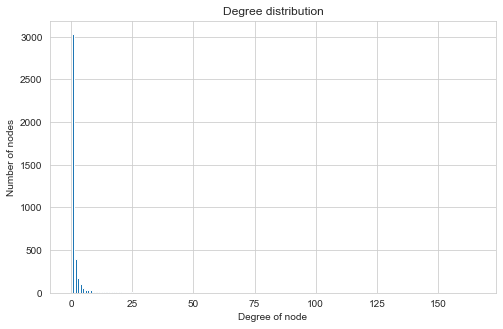

In [272]:
## degree distribution plot of the networkx graph object is plotted using the following function
from collections import Counter
def degree_dist(G):
    plt.figure(figsize=(8,5))
    plt.title("Degree distribution")
    degree_sequence = nx.degree_histogram(G) #historgram returns counts of degrees 
    degrees = range(len(degree_sequence)) #Degree values according the sequences
    plt.bar(degrees,degree_sequence)
    plt.xlabel("Degree of node") 
    plt.ylabel("Number of nodes")
    plt.show()
degree_dist(G)

### Comparisons with random networks

- Erdos renyi graph: Degree distribution graph with basic measures of ER random graph. 

- Barabasi albert graph: Degree distribution graph with basic measures for prefrential attachment graphs.

- Degree preserved random graph: Degree and basic measures using expected degree graph function

In [273]:
n = 3962
p = 0.00031
Ger = nx.erdos_renyi_graph(n, p, seed=1000, directed=True)

In [274]:
basic_details(Ger)

Number of node                           3962  
Number of edges                          4843  
Average clusetring                       0.00023136463065791686
Network desnity                          0.0003085994554936884


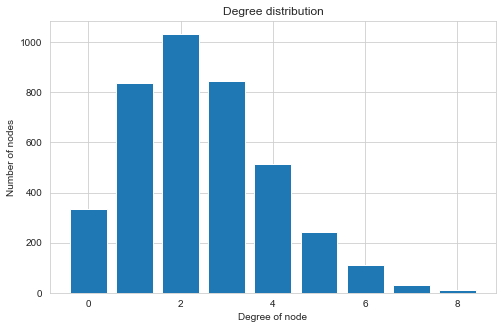

In [275]:
degree_dist(Ger)

## Random graph with prefrential attachment.

In [276]:
Gbg = nx.barabasi_albert_graph(n, 1, seed=1000, initial_graph=None)

In [277]:
basic_details(Gbg)

Number of node                           3962  
Number of edges                          3961  
Average clusetring                       0.0   
Network desnity                          0.0005047955577990914


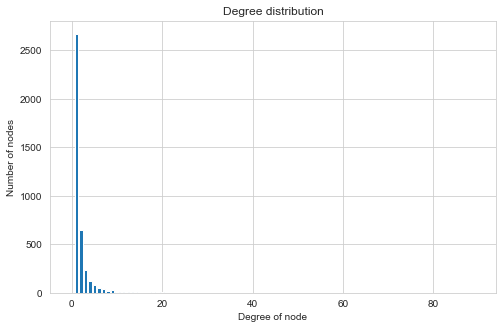

In [278]:
degree_dist(Gbg)

In [279]:
## Degree preserved random networks generator
from networkx.generators.degree_seq import expected_degree_graph
Gdeg = expected_degree_graph([deg for (_, deg) in G.degree()], selfloops=False)
nx.info(Gdeg)

'Graph with 3962 nodes and 4048 edges'

In [280]:
basic_details(Gdeg)

Number of node                           3962  
Number of edges                          4048  
Average clusetring                       0.010613714093923105
Network desnity                          0.0005158829633856909


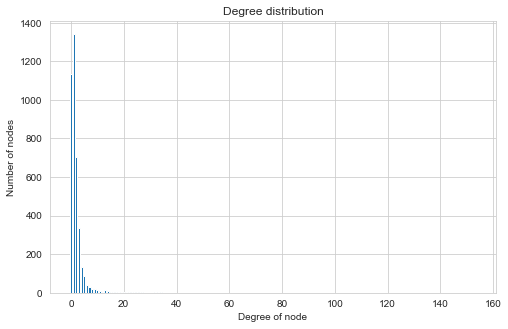

In [281]:
degree_dist(Gdeg)

## Getting the sentiments in all available tweets

In [282]:
import plotly.express as px
import seaborn as sns

In [283]:
from nrclex import NRCLex
from collections import Counter

In [284]:
## The following function will take textual corpus of the dataset and return the text object of nrclex libaray
## with the help of this object we can get the emotions details of the particular corpus

def get_emotions(corpus, visual = "yes"):
    all_tweet_text = " ".join(corpus)
    text_object = NRCLex(all_tweet_text)
    counted_words =Counter(all_tweet_text.split())
    dat = text_object.raw_emotion_scores
    emotion_df = pd.DataFrame.from_dict(dat, orient='index')
    emotion_df = emotion_df.reset_index()
    emotion_df = emotion_df.rename(columns={'index' : 'Emotion Classification' , 0: 'Emotion Count'})
    emotion_df = emotion_df.sort_values(by=['Emotion Count'], ascending=False)
    if(visual):
        fig = plt.figure(figsize=(10,6))
        sns.barplot(x=emotion_df["Emotion Count"], y=emotion_df['Emotion Classification'], orient="h")
        plt.show()
    return text_object,counted_words

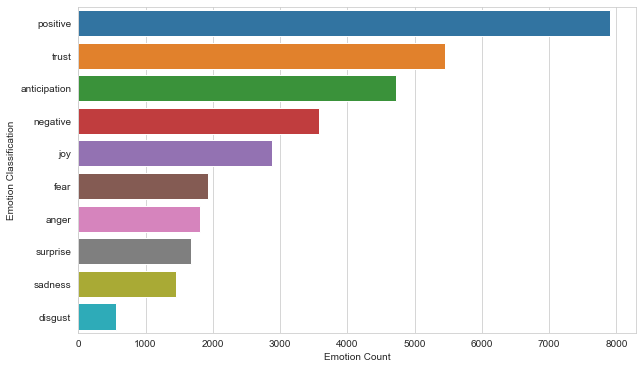

In [285]:
txt_obj,cw=get_emotions(data["cleaned_text"])

In [286]:
## This fucntion is returning the top X sorted values for the dictionary in our case we have
## ranked top 20 nodes for each centrality measures
def top_central(deg, number=10):
    Deg_sorted_keys = sorted(deg, key=deg.get, reverse=True)
    i=0
    nodes= []
    for key in Deg_sorted_keys:
      if(i<number):
          print('{0:<30}'.format(key),'{0:<6}'.format(round(deg[key],3)))
          nodes.append(key)
          i+=1
    return nodes

#### top indegree central nodes

In [287]:
indeg = dict(G.in_degree())
print('{0:<30}'.format("node"),'{0:<6}'.format("Indegree"))
in_top = top_central(indeg, number=20) ## keeping the top 2o indegree central nodes so we can get their tweet information later

node                           Indegree
@elonmusk                      80    
@jack                          66    
@CathieDWood                   40    
@michael_saylor                37    
@APompliano                    19    
@Olympics                      19    
@Tesla                         18    
@Tokyo2020                     18    
@WeAreTeamIndia                14    
@BustaRhymes                   14    
@MicroStrategy                 13    
@CNBC                          12    
@Grayscale                     11    
@naomiosaka                    11    
@novogratz                     9     
@nayibbukele                   9     
@MikeTyson                     9     
@ianuragthakur                 8     
@SpaceX                        8     
@Bitcoin                       8     


### Top outdegree central nodes

In [288]:
outdeg = dict(G.out_degree())
print('{0:<30}'.format("node"),'{0:<6}'.format("Outdegree"))
out_top = top_central(outdeg, number=20) ## keeping the out degree ranked nodes in out_top to get their specifc tweet
## sentiments in from the dataset

node                           Outdegree
@CoinSwitch Kuber              165   
@CoinDesk                      140   
@Spiros Margaris               137   
@Bitcoin Magazine              112   
@Shug 🤙🏻                       68    
@Herbert R. Sim                48    
@Peter Schiff                  46    
@Jeff Booth                    41    
@Jay Gould                     40    
@Frantisek Hrinkanic           38    
@𝚃𝚒𝚏𝚏𝚊𝚗𝚢 𝙷𝚊𝚢𝚍𝚎𝚗                33    
@Natalie Brunell               32    
@Squawk Box                    31    
@Derek Ross 🌋                  31    
@David Gokhshtein              30    
@Hut 8 Mining                  29    
@Mark Jeffrey ⚡️🚀              27    
@sportsfile                    26    
@The Exchange                  25    
@Real Vision                   25    


### Top betweeness central nodes

In [289]:
Bet = nx.betweenness_centrality(G,normalized=False)
print('{0:<30}'.format("node"),'{0:<6}'.format("Betweeness centrality"))
bet_top=top_central(Bet, number=20) ## similarly we have saved the top 20 nodes for betweeness centrality as well

node                           Betweeness centrality
@CoinDesk                      1052.5
@Grayscale                     180.0 
@BlockFi                       103.0 
@TheStreet                     76.5  
@CNBC                          70.0  
@Blockstream                   43.0  
@Benzinga                      33.0  
@CoinMarketCap                 23.0  
@Binance                       9.0   
@reason                        6.0   
@Bitstamp                      6.0   
@Hedgeye                       5.0   
@Gemini                        4.0   
@Ledger                        3.0   
@DailyFX                       1.0   
@CryptoCompare                 1.0   
@Telegraph Technology Intelligence 0.0   
@LFDodds                       0.0   
@Liquid_BTC                    0.0   
@JimCramer                     0.0   


In [290]:
data_ev = pd.DataFrame()
for val in ev:
    data_ev = data_ev.append({"Id":val, "Ev":ev[val]},ignore_index=True)
data_ev.to_csv("data_ev.csv", index=False)

In [291]:
## selecting the tweet data from the edge inforamtion for a particular centrality measure
## if it is inderege we will pass indegree top nodes with num value 1 and if it is outdegree then
## we will pass outdegree top nodes with num value 0. 0 and 1 are representing source and destination nodes in the
## network
def get_selected_tweets(G, num,top):
  tweets = []
  for edge in G.edges(data=True):
      if(edge[num] in top):
          tweets.append(edge[2]["tweet"])
  return tweets

In [292]:
from wordcloud import WordCloud
## this function will help us visualize bar plots of the sentiments and word cloud visualizations 
## for each of the top ranked central nodes.
def print_sentiments(sentiments, counted_words):
    positives = dict()
    negatives = dict()
    word_emotions = sentiments.affect_dict

    for word in word_emotions:
        if("negative" in word_emotions[word]):
            negatives[word] = counted_words[word]
        if("positive" in word_emotions[word]):
            positives[word] = counted_words[word]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
    fig.suptitle('Postive and negative words sentiments')
    wc1 = WordCloud(background_color="white",width=1000, height=1000, max_words=100).generate_from_frequencies(positives)
    wc = WordCloud(background_color="white",width=1000, height=1000, max_words=100).generate_from_frequencies(negatives)
    ax1.imshow(wc1)
    ax2.imshow(wc)
    ax1.axis("off")
    ax1.set_title("positive sentiments")
    ax2.set_title("negative sentiments")
    ax2.axis("off")
    plt.show()
    plt.close()

### Indegree based Top user sentiments

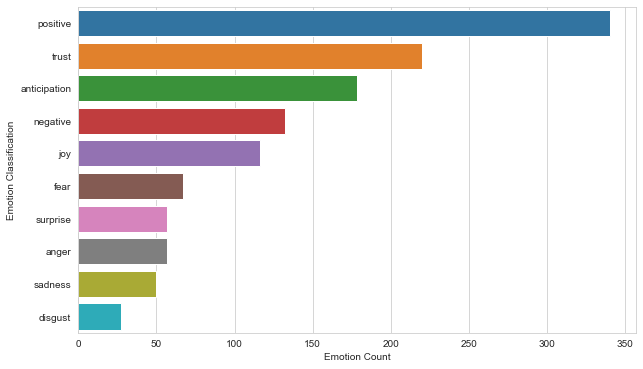

In [293]:
indeg_sentiments,counted_words = get_emotions(get_selected_tweets(G, 1, in_top))

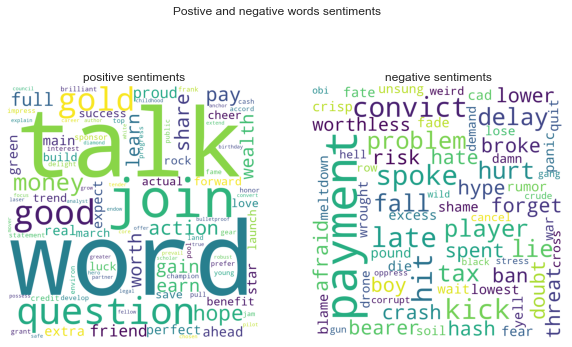

In [294]:
print_sentiments(indeg_sentiments,counted_words)

### Out degree based top nodes sentiments

In [295]:
out_top

['@CoinSwitch Kuber',
 '@CoinDesk',
 '@Spiros Margaris',
 '@Bitcoin Magazine',
 '@Shug 🤙🏻',
 '@Herbert R. Sim',
 '@Peter Schiff',
 '@Jeff Booth',
 '@Jay Gould',
 '@Frantisek Hrinkanic',
 '@𝚃𝚒𝚏𝚏𝚊𝚗𝚢 𝙷𝚊𝚢𝚍𝚎𝚗',
 '@Natalie Brunell',
 '@Squawk Box',
 '@Derek Ross 🌋',
 '@David Gokhshtein',
 '@Hut 8 Mining',
 '@Mark Jeffrey ⚡️🚀',
 '@sportsfile',
 '@The Exchange',
 '@Real Vision']

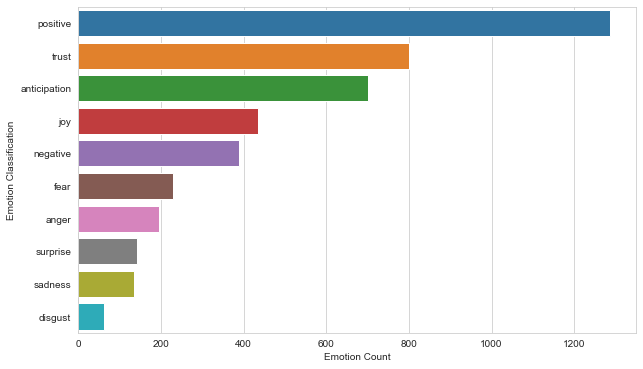

In [296]:
outdeg_sentiments,counted_words = get_emotions(get_selected_tweets(G, 0 ,out_top))

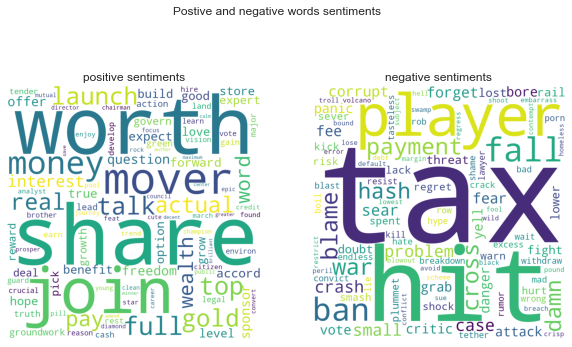

In [297]:
print_sentiments(outdeg_sentiments,counted_words)

### Betweeness degree based sentiments

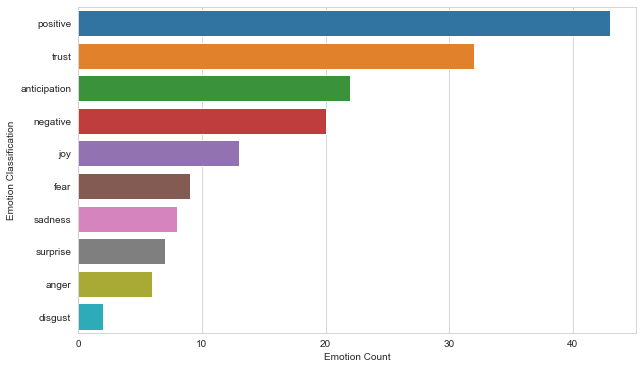

In [298]:
bet_sentiments,counted_words = get_emotions(get_selected_tweets(G, 1, bet_top))

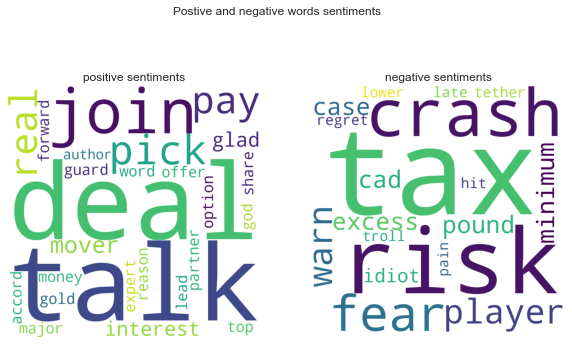

In [299]:
print_sentiments(bet_sentiments,counted_words)

### Community detections

In [ ]:
from cdlib import algorithms

In [ ]:
coms = algorithms.rb_pots(G)

In [ ]:
## in this cell the community detection process is applied to our network
## we have used rb_pots algorithm from the cdlib community detctions libarary. 
## the reference to the algorithm is here 
## https://cdlib.readthedocs.io/en/latest/reference/cd_algorithms/algs/cdlib.algorithms.rb_pots.html

partitions = coms.to_node_community_map()
comunity_lists = {}
node_dic = {}
for node in partitions:
    node_dic[node] = partitions[node][0]
    if(partitions[node][0] not in comunity_lists.keys()):
        comunity_lists[partitions[node][0]] = [node]
    else:
        comunity_lists[partitions[node][0]].append(node)

In [ ]:
nx.set_node_attributes(G, node_dic, "clustering")

In [ ]:
top_comunities = {}
for com in comunity_lists:
    if(len(comunity_lists[com]) > 150):
        top_comunities[com] = comunity_lists[com]

In [ ]:
## function to display the postive and negative sentiments within tweets just like the top central nodes sentiments 
## visializaiton: this will visualize the sentiments for the top central selected nodes within the community
def postive_negative_wc(sentiments,counted_words):
    positives = dict()
    negatives = dict()
    word_emotions = sentiments.affect_dict

    for word in word_emotions:
        if("negative" in word_emotions[word]):
            negatives[word] = counted_words[word]
        if("positive" in word_emotions[word]):
            positives[word] = counted_words[word]
    if(len(negatives) < 1):
        negatives["No Negatives"] = 1
    if(len(positives) < 1):
        negatives["No Postives"] = 1
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
    fig.suptitle('Postive and negative words sentiments')
    wc1 = WordCloud(background_color="white",width=1000, height=1000, max_words=100).generate_from_frequencies(positives)
    wc = WordCloud(background_color="white",width=1000, height=1000, max_words=100).generate_from_frequencies(negatives)
    ax1.imshow(wc1)
    ax2.imshow(wc)
    ax1.axis("off")
    ax1.set_title("positive sentiments")
    ax2.set_title("negative sentiments")
    ax2.axis("off")
    plt.show()
    plt.close()


Top users in comunity ID 0
@elonmusk                      80    
@jack                          66    
@CathieDWood                   40    
@BustaRhymes                   14    
@MikeTyson                     9     
@Bitcoin                       8     
@ARKInvest                     8     
@BTCTN                         7     
@jack,                         5     
@elonmusk,                     5     
sentiments in community ID:  0


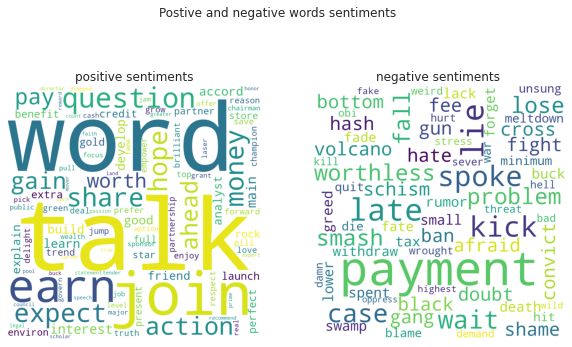

Top users in comunity ID 1
@LynAldenContact               5     
@gladstein                     5     
@ln_strike                     4     
@CynthiaMLummis                4     
@SenatorSinema                 4     
@SenToomey                     4     
@RonWyden                      4     
@woonomic                      3     
@BTCization                    3     
@dennis_porter_                3     
sentiments in community ID:  1


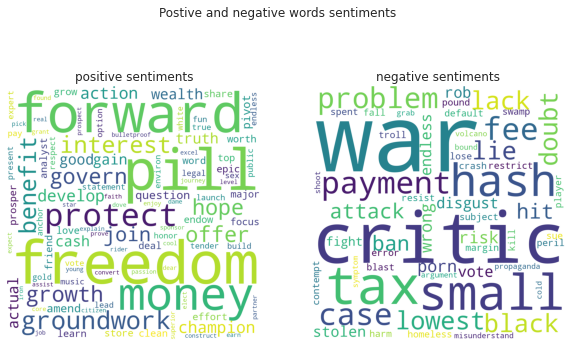

Top users in comunity ID 2
@Aditya8900                    1     
@PrimeVideo                    1     
@CSKSupport                    1     
@adityaaao                     1     
@PrachiB35193107               1     
@PankajB85643327               1     
@arpitshukla_                  1     
@amazonprimeIN                 1     
@Anjali94774883                1     
@KumathMayank                  1     
sentiments in community ID:  2


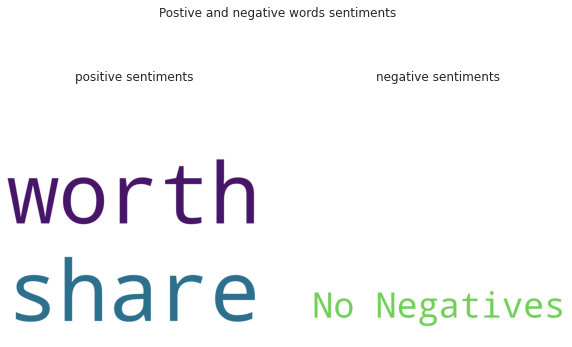

Top users in comunity ID 3
@CoinDesk                      7     
@BlockFi                       5     
@Liquid_BTC                    3     
@WhatBitcoinDid                3     
@emilychangtv                  3     
@Bitstamp                      3     
@technology                    3     
@Tether_to                     3     
@CadeCunningham_               3     
@Blockstream                   2     
sentiments in community ID:  3


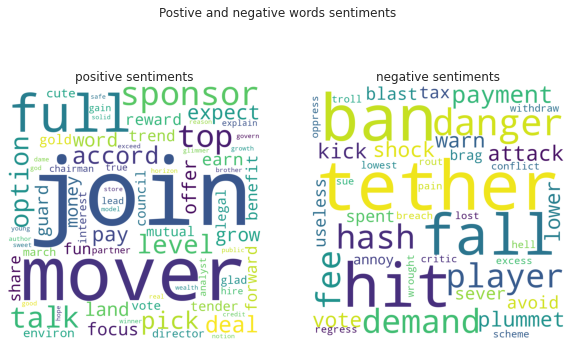

In [ ]:
for comunity in top_comunities:
    tweets = []
    print("Top users in comunity ID", comunity)
    indeg_com = dict()
    for user in top_comunities[comunity]:
        indeg_com[user]=indeg[user]
    top_central(indeg_com, number=10)
    print("sentiments in community ID: ", comunity)
    for edge in G.edges(data=True):
      if(edge[0] in top_comunities[comunity] or edge[1] in top_comunities[comunity]):
          tweets.append(edge[2]["tweet"])
    sentiments,counted_words = get_emotions(tweets,visual=False)
    postive_negative_wc(sentiments, counted_words)

In [ ]:
nx.write_gexf(G, "networkformat.gexf")